# TASK 04:

Analyze and Visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topic or brands.

# Sentiment Analysis on Twitter Entity Data:

- This project aims to classify Twitter posts into Positive, Negative, or Neutral sentiments using Logistic Regression. It involves cleaning text data, extracting features with TF-IDF, and visualizing entity-wise sentiment trends to understand public opinion on popular brands and topics.

Import Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...


Load Data:

In [3]:
train_df = pd.read_csv("twitter_training.csv", header=None, names=["id", "entity", "sentiment", "text"])
val_df = pd.read_csv("twitter_validation.csv", header=None, names=["id", "entity", "sentiment", "text"])

Combine Datasets:

In [4]:
df = pd.concat([train_df, val_df], ignore_index=True)
df = df.dropna()
df = df[df['sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

Advanced Text Cleaning:

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def advanced_clean(text):
    text = re.sub(r"http\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower().strip()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(advanced_clean)

Visualise Sentiment Distribution:

C:\Users\Hp\AppData\Local\Temp\ipykernel_12800\3142606087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


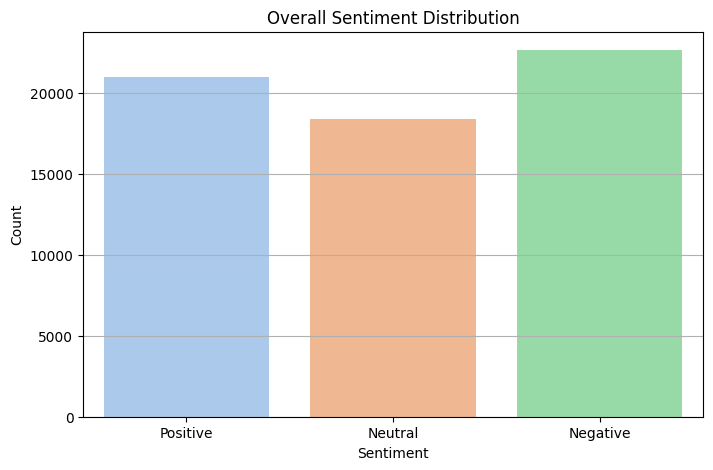

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

Entity-wise Sentiment Distribution:

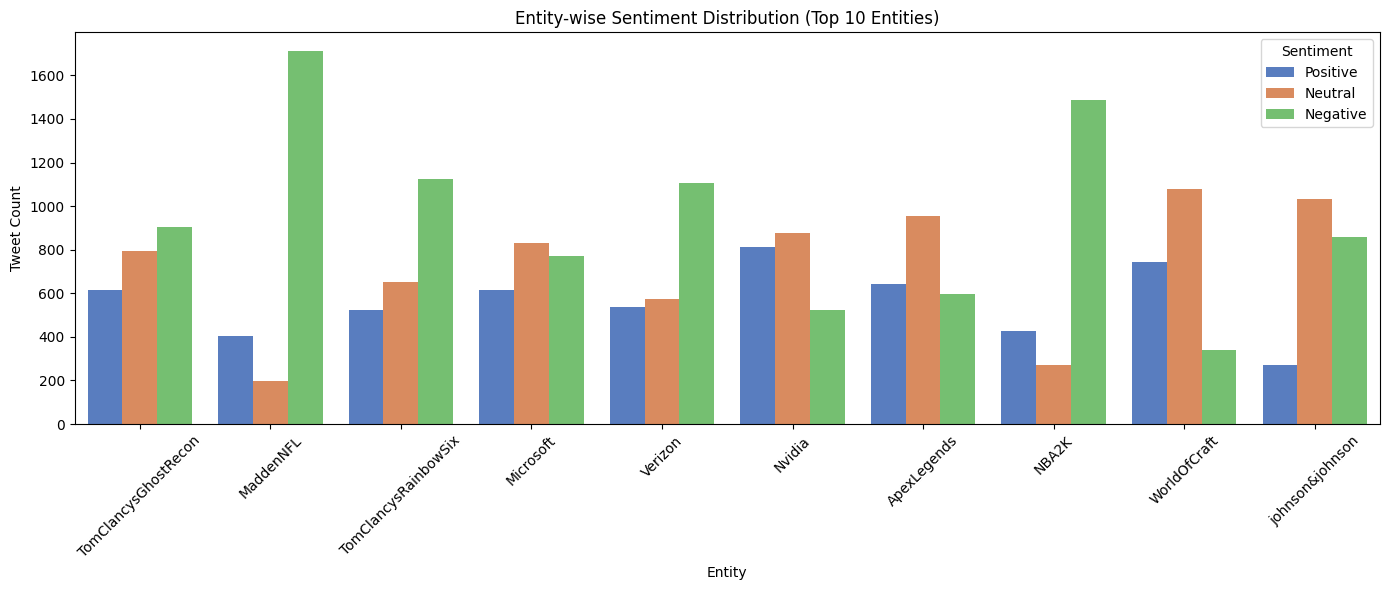

In [7]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='entity', hue='sentiment', order=df['entity'].value_counts().index[:10], palette='muted')
plt.title('Entity-wise Sentiment Distribution (Top 10 Entities)')
plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Wordclouds by Sentiment:

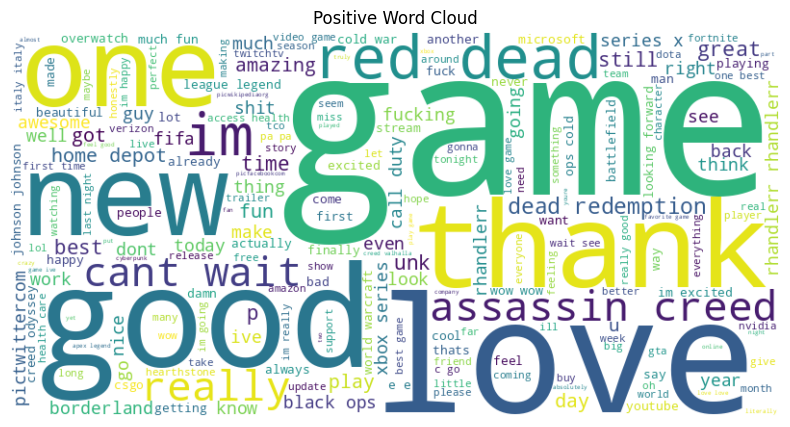

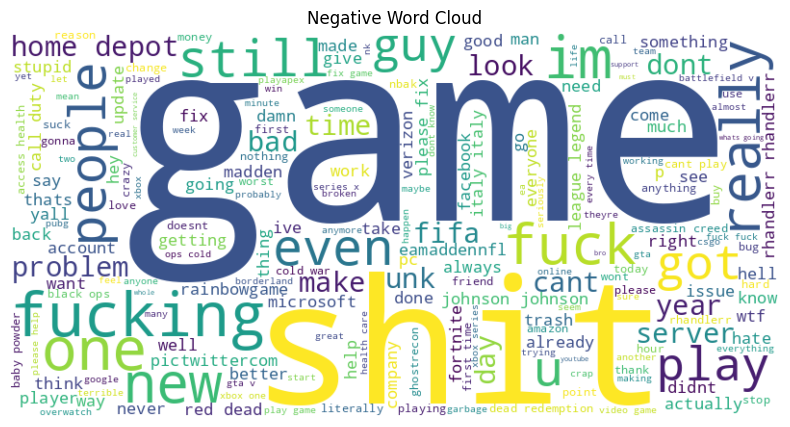

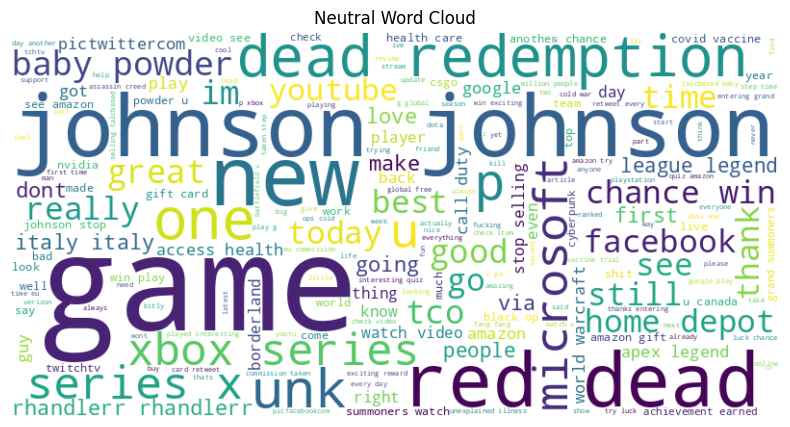

In [9]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Word Cloud")
    plt.show()

Sentiment Score by Entity:

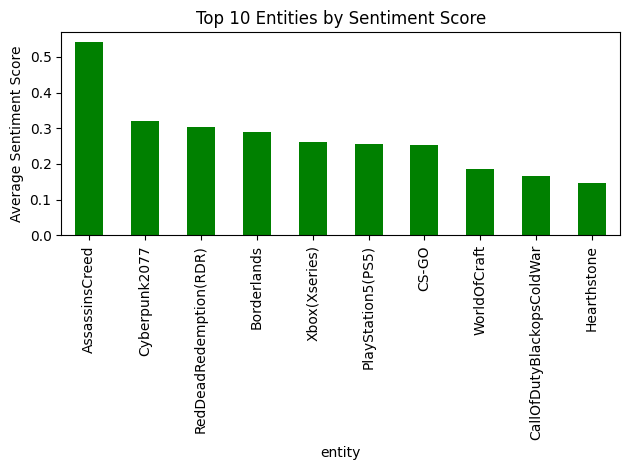

In [10]:
sentiment_score = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_score)
entity_scores = df.groupby('entity')['sentiment_score'].mean().sort_values(ascending=False)
entity_scores.head(10).plot(kind='bar', title='Top 10 Entities by Sentiment Score', color='green')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

Vectorise Text and Split Data:

In [11]:
vectorizer = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    stop_words='english',
    strip_accents='unicode'
)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Train Logistic Regression Model:

              precision    recall  f1-score   support

    Negative       0.87      0.82      0.85      4525
     Neutral       0.75      0.82      0.78      3679
    Positive       0.84      0.81      0.82      4186

    accuracy                           0.82     12390
   macro avg       0.82      0.82      0.82     12390
weighted avg       0.82      0.82      0.82     12390



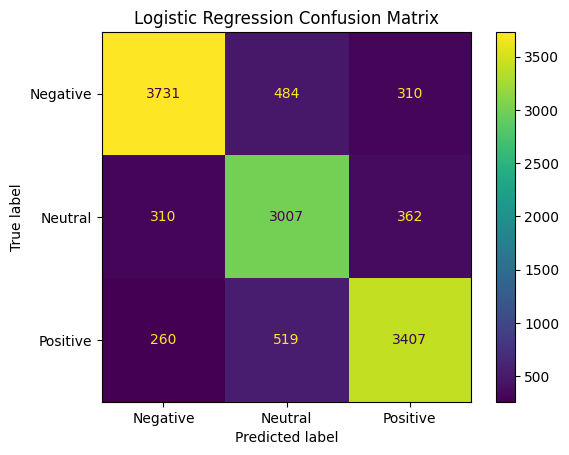

In [12]:
lr = LogisticRegression(C=10, max_iter=300, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Visualizing the Logistic Regression Prediction Probabilities:

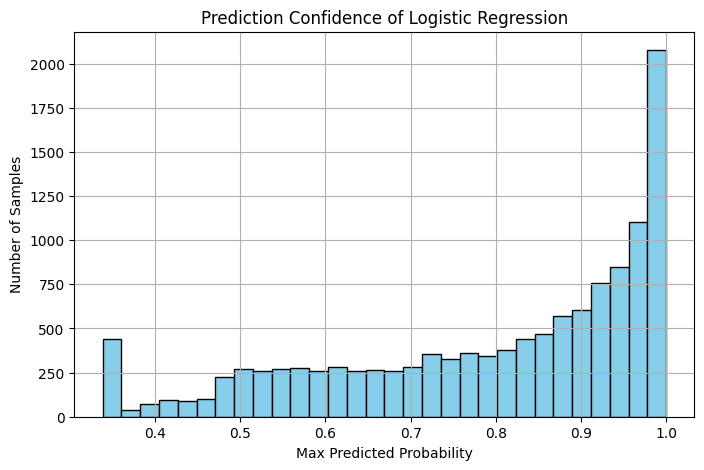

In [13]:
probs = lr.predict_proba(X_test)
plt.figure(figsize=(8,5))
plt.hist(probs.max(axis=1), bins=30, color='skyblue', edgecolor='black')
plt.title("Prediction Confidence of Logistic Regression")
plt.xlabel("Max Predicted Probability")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

## Summary:

- This project analyzes sentiment in Twitter data across multiple entities to understand how people feel about various brands, games, or platforms. It includes data cleaning, text preprocessing, entity-level and global sentiment visualizations, and training a logistic regression classifier. Evaluation includes classification metrics and confusion matrix. Ethical deployment and model monitoring are also considered for real-world readiness.

- Such analysis helps companies monitor public opinion, understand brand perception, and make data-driven marketing decisions.

## Disclaimer:
- This dataset contains user-generated Twitter content, which may include foul language or offensive terms. These are retained solely for the purpose of accurate sentiment analysis and do not reflect the views or intent of this project. Viewer discretion is advised.